## Graphs from Data

In this session, we would like to start digging into the details of (social) network analysis. Let’s use a famous example from the past. Zachary’s karate club is a social network of friendships of 34 members of a karate club at a US university in the 1970s. It is described in W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977). It is a famous early example of successful social network analysis. According to Wikipedia, ‘during the study a conflict arose between the administrator and instructor, which led to the split of the club into two. Half of the members formed a new club around the instructor members from the other part found a new instructor or gave up karate. Based on collected data Zachary assigned correctly all but one member of the club to the groups they actually joined after the split.’ https://en.wikipedia.org/wiki/Zachary%27s_karate_club. Let's see whether we can recreate this analysis.

First we load some of the libraries we are always using. Run the code below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Now to the main star of this show, which is the networkx library: https://networkx.org/ Load this commonly used network library with `import networkx as nx`.

In [2]:
import networkx as nx 

You have two data frames  in the environment. 

The first is karate_nodes, which contains the nodes of the network with information about the karate club members. Run the code below.

In [3]:
karate_nodes = pd.read_csv("https://tinyurl.com/2p9byesa")
karate_nodes.head()

,id,first_name,last_name,gender,age
0,1,Trang,Philips,F,18
1,2,Lovie,Stanek,F,36
2,3,Gary,James,M,43
3,4,Maximo,Larimer,M,41
4,5,Bruno,Drury,M,18


The second data frame karate_edges contains the edges with information whether one member likes another and by how much (weight). Run the code below.

In [4]:
karate_edges = pd.read_csv("https://tinyurl.com/mtmwc8hd")
karate_edges.head()

,from,to,weight,type
0,1,2,9,likes
1,1,3,5,likes
2,1,4,2,likes
3,1,5,3,likes
4,1,6,12,likes


Now, let’s create a graph with these these edges and nodes. Each graph is just that, a collection of edges and nodes. In our case, we can easily create the graph from the edge list in karate_edges. The networkx command is:
```
G = nx.from_pandas_edgelist(karate_edges, source = "from", target = "to", create_using=nx.DiGraph(), edge_attr = True)
```

The first argument is the data frame, the second the source node, the third is the target node. We also tell from_pandas_edgelist to create a directed graph with create_using=nx.DiGraph() and to keep all the edge attributes with edge_attr = True.

In [5]:
G = nx.from_pandas_edgelist(karate_edges, source = "from", target = "to", create_using=nx.DiGraph(), edge_attr = True)

Unfortunately, it is not very easy to add all the attributes of the nodes. https://newbedev.com/networkx-setting-node-attributes-from-dataframe explains how this is done by creating first a dictionary of dictionaries from karate_nodes.
Type in: `node_attr = karate_nodes.set_index('id').to_dict('index')`. This will first set the index of karate_nodes to the ids of all nodes. to_dict will then add the row values as another dictionary. Check out how this looks for a row by adding `node_attr[2]`.

In [6]:
node_attr = karate_nodes.set_index('id').to_dict('index')
node_attr[2]

{'first_name': 'Lovie', 'last_name': 'Stanek', 'gender': 'F', 'age': 36}

To set all the node attributes, now run `nx.set_node_attributes(G, node_attr)`.

In [7]:
nx.set_node_attributes(G, node_attr)

With `print(nx.info(G))`, you print out information about the graph. 

In [8]:
print(nx.info(G))

DiGraph with 34 nodes and 78 edges


`G.nodes()` provides a view of nodes.

In [9]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32, 31, 10, 28, 29, 33, 17, 34, 15, 16, 19, 21, 23, 24, 26, 30, 25, 27))

`G.edges()` provides a view of edges.

In [10]:
G.edges()

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (14, 34), (20, 34), (32, 33), (32, 34), (31, 33), (31, 34), (10, 34), (28, 34), (29, 32), (29, 34), (33, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (26, 32), (30, 33), (30, 34), (25, 26), (25, 28), (25, 32), (27, 30), (27, 34)])

Let's check that we added the attributes correctly with `G.nodes.data()`.

In [11]:
G.nodes.data()

NodeDataView({1: {'first_name': 'Trang', 'last_name': 'Philips', 'gender': 'F', 'age': 18}, 2: {'first_name': 'Lovie', 'last_name': 'Stanek', 'gender': 'F', 'age': 36}, 3: {'first_name': 'Gary', 'last_name': 'James', 'gender': 'M', 'age': 43}, 4: {'first_name': 'Maximo', 'last_name': 'Larimer', 'gender': 'M', 'age': 41}, 5: {'first_name': 'Bruno', 'last_name': 'Drury', 'gender': 'M', 'age': 18}, 6: {'first_name': 'Lillian', 'last_name': 'Sowinski', 'gender': 'F', 'age': 22}, 7: {'first_name': 'Candice', 'last_name': 'Gonsalez', 'gender': 'F', 'age': 17}, 8: {'first_name': 'Kathrin', 'last_name': 'Macaluso', 'gender': 'F', 'age': 40}, 9: {'first_name': 'Ivonne', 'last_name': 'Montes', 'gender': 'F', 'age': 20}, 11: {'first_name': 'Nereida', 'last_name': 'Hair', 'gender': 'F', 'age': 18}, 12: {'first_name': 'Angelo', 'last_name': 'Demar', 'gender': 'M', 'age': 20}, 13: {'first_name': 'Alfredo', 'last_name': 'Fenderson', 'gender': 'M', 'age': 21}, 14: {'first_name': 'Clement', 'last_name'

To get the age of node 1, type `G.nodes[1]['age']`.

In [12]:
G.nodes[1]['age']

18

There are a lot of options here and it is good at this moment to check out the documention. To get only edges incident to nodes 1 and 3, type `G.edges([1, 3])`.

In [13]:
G.edges([1, 3])  

OutEdgeDataView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33)])

We can see the node together with its attributes, if we want to now only see the age attribute of each node, we access it using `nx.get_node_attributes(G, 'age').values()`. get_node_attributes returns a dictionary with the node's id as the key and the age the value. With values(), we only receive the values().

In [14]:
nx.get_node_attributes(G, 'age').values()

dict_values([18, 36, 43, 41, 18, 22, 17, 40, 20, 18, 20, 21, 25, 40, 18, 36, 45, 23, 44, 21, 25, 43, 28, 23, 26, 42, 41, 36, 43, 36, 45, 26, 31, 26])

It's a dictionary. You would have to cast to a list to get only the ages. Do you know how?

Let's try an plot this graph. It's easy in networkx. Just run nx.draw(G).

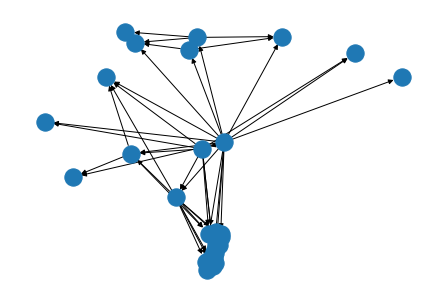

In [15]:
nx.draw(G)

There is a great number of options to improve this graphy. You can, for instance, add the labels, use curved edges  and reduce the arrow size. Try: `nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4", arrowsize=0.4)`


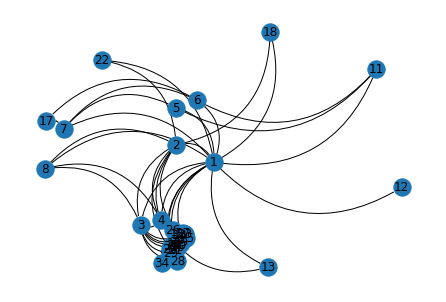

In [16]:
nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4", arrowsize=0.4)

In the next session, we will explore more options how to improve this graph.